# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started 

Import the file `'turnstile_180901.txt'`. 

In [20]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [22]:
# We can check and see what the columns look like with this code:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [23]:
# Rename all the columns to lower case
df.columns = df.columns.str.lower()

In [24]:
# Now let's check and make sure that worked
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

Change the index to `'linename'`: 

In [25]:
# Change the index to 'linename'

df.set_index('linename', inplace=True)

In [29]:
df.head

<bound method NDFrame.head of        linename    c/a  unit       scp        station division        date  \
0       NQR456W   A002  R051  02-00-00          59 ST      BMT  08/25/2018   
1       NQR456W   A002  R051  02-00-00          59 ST      BMT  08/25/2018   
2       NQR456W   A002  R051  02-00-00          59 ST      BMT  08/25/2018   
3       NQR456W   A002  R051  02-00-00          59 ST      BMT  08/25/2018   
4       NQR456W   A002  R051  02-00-00          59 ST      BMT  08/25/2018   
...         ...    ...   ...       ...            ...      ...         ...   
197620        R  TRAM2  R469  00-05-01  RIT-ROOSEVELT      RIT  08/31/2018   
197621        R  TRAM2  R469  00-05-01  RIT-ROOSEVELT      RIT  08/31/2018   
197622        R  TRAM2  R469  00-05-01  RIT-ROOSEVELT      RIT  08/31/2018   
197623        R  TRAM2  R469  00-05-01  RIT-ROOSEVELT      RIT  08/31/2018   
197624        R  TRAM2  R469  00-05-01  RIT-ROOSEVELT      RIT  08/31/2018   

            time     desc  entrie

Reset the index: 

In [26]:
# Reset the index
df.reset_index(inplace=True)


Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [27]:
# Add a new 'num_lines' column
df['num_lines'] = df['linename'].apply(lambda x: len(x))

In [28]:
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,num_lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7


Write a function to clean column names: 

In [30]:
# Before we start cleaning, let's look at what we've got

df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               ',
       'num_lines'],
      dtype='object')

In [31]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = col_name.strip()
    cleaned = cleaned.replace(' ', '_')
    cleaned = ''.join(char for char in cleaned if char.isalnum() or char == '_')
    cleaned = cleaned.lower()
    return cleaned

In [33]:
# Use the above function to clean the column 
df.columns = df.columns.map(clean)


In [34]:
# Check to ensure the column names were cleaned
df.columns

Index(['linename', 'ca', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [35]:
# Convert the data type of the 'date' column to a date
df['date'] = pd.to_datetime(df['date'])

# Add a new column 'day_of_week' that represents the day of the week 
df['day_of_week'] = df['date'].dt.day_name()

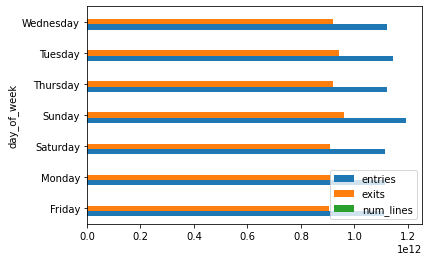

In [36]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum(numeric_only = True)
grouped.plot(kind='barh')
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [37]:
# Reset the index of grogrouped.reset_index(drop=True, inplace=True)
grouped = grouped.reset_index(drop=True, inplace=True)
# Print the first five rows of grouped
print(df.head())

  linename    ca  unit       scp station division       date      time  \
0  NQR456W  A002  R051  02-00-00   59 ST      BMT 2018-08-25  00:00:00   
1  NQR456W  A002  R051  02-00-00   59 ST      BMT 2018-08-25  04:00:00   
2  NQR456W  A002  R051  02-00-00   59 ST      BMT 2018-08-25  08:00:00   
3  NQR456W  A002  R051  02-00-00   59 ST      BMT 2018-08-25  12:00:00   
4  NQR456W  A002  R051  02-00-00   59 ST      BMT 2018-08-25  16:00:00   

      desc  entries    exits  num_lines day_of_week  
0  REGULAR  6736067  2283184          7    Saturday  
1  REGULAR  6736087  2283188          7    Saturday  
2  REGULAR  6736105  2283229          7    Saturday  
3  REGULAR  6736180  2283314          7    Saturday  
4  REGULAR  6736349  2283384          7    Saturday  


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [44]:
# Use this dictionary to create a new column 
weekend_map = {'Monday':False, 'Tuesday':False, 'Wednesday':False, 'Thursday':False, 'Friday':False, 'Saturday':True, 'Sunday':True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)

TypeError: 'NoneType' object is not subscriptable

In [41]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped.groupby('is_weekend').sum(numeric_only = True)
wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

AttributeError: 'NoneType' object has no attribute 'groupby'

Remove the `'c/a'` and `'scp'` columns. 

In [ ]:
# Remove the 'c/a' and 'scp' columns
df = None
df.head(2)

## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here 

## Summary

You practiced your data cleanup skills using Pandas.